In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [ ]:
# Step 1: Create a sample weather dataset
np.random.seed(42)  # for reproducibility
n_samples = 100

# Generate random features
temperature = np.random.uniform(0, 35, n_samples)  # Temperature in Celsius
humidity = np.random.uniform(30, 100, n_samples)  # Humidity percentage
wind_speed = np.random.uniform(0, 30, n_samples)  # Wind speed in km/h
pressure = np.random.uniform(990, 1030, n_samples)  # Atmospheric pressure in hPa

# Create target variable with some logic
rain_probability = (humidity / 100) * (1 - (pressure - 990) / 40)
rain = (rain_probability > 0.5).astype(int)

# Create a DataFrame
data = pd.DataFrame({
    'temperature': temperature,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'pressure': pressure,
    'rain': rain
})

print("Sample of the generated dataset:")
print(data.head())

Sample of the generated dataset:
   temperature   humidity  wind_speed     pressure  rain
0    13.108904  32.200043   19.260949   992.067269     0
1    33.275001  74.548729    2.524199  1011.254185     0
2    25.619788  52.004919    4.848861  1011.625405     0
3    20.953047  65.599948   26.956626  1015.497196     0
4     5.460652  93.529653   18.192872  1019.043653     0


In [ ]:
# Step 2: Preprocess the data
X = data.drop('rain', axis=1)
y = data['rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 80
Testing set size: 20



Model Accuracy: 0.85

Decision tree visualization saved as 'weather_decision_tree.png'


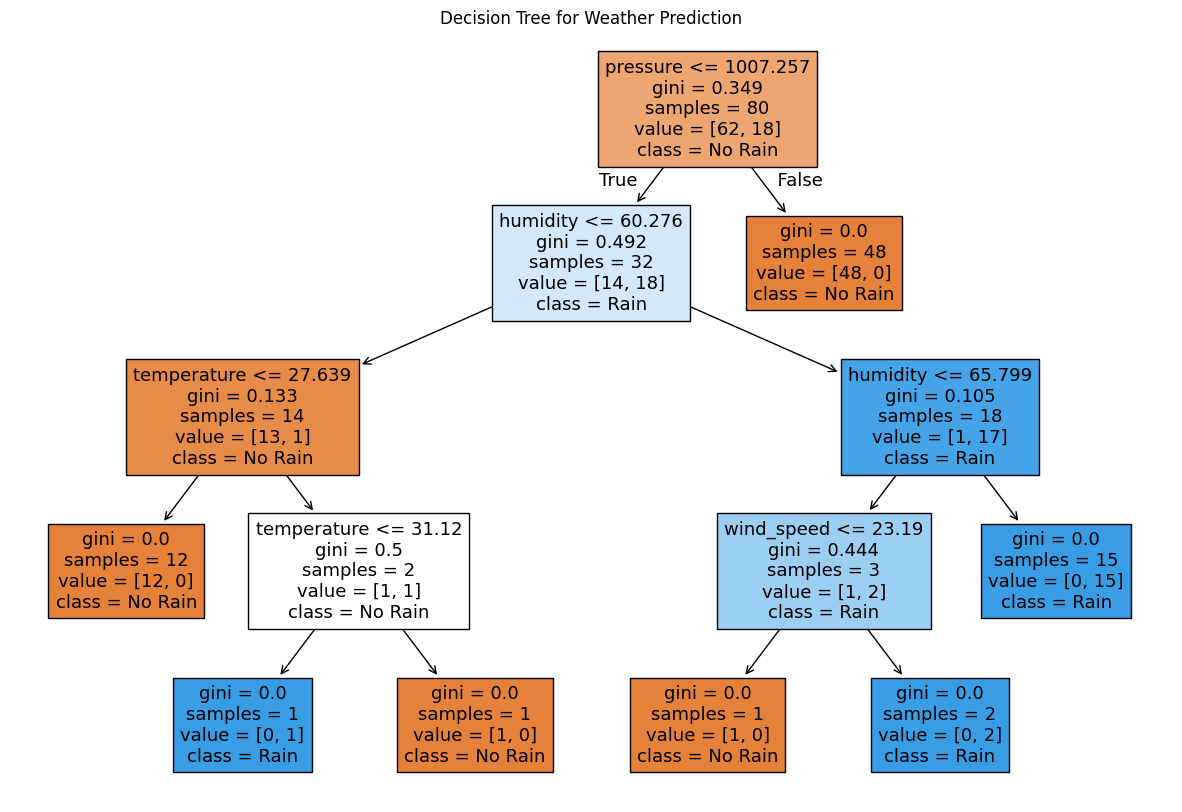

In [ ]:
# Step 3: Train the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Visualize decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True)
plt.title("Decision Tree for Weather Prediction")
plt.savefig('weather_decision_tree.png')
print("\nDecision tree visualization saved as 'weather_decision_tree.png'")

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Feature Importance:
       Feature  Importance
1     humidity    0.450162
3     pressure    0.435484
0  temperature    0.066564
2   wind_speed    0.047790

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.67      0.73         6

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20


Confusion Matrix:
[[13  1]
 [ 2  4]]



--- Part 2: Debugging Issues ---
Training Accuracy: 1.00
Testing Accuracy: 0.85
Possible overfitting detected

Adjusting tree depth to prevent overfitting...
Max Depth = 2: Training Accuracy = 0.97, Testing Accuracy = 0.95
Max Depth = 3: Training Accuracy = 0.97, Testing Accuracy = 0.95
Max Depth = 4: Training Accuracy = 1.00, Testing Accuracy = 0.85
Max Depth = 5: Training Accuracy = 1.00, Testing Accuracy = 0.85

Optimal tree depth: 2
Optimized Model Accuracy: 0.95
Optimized decision tree visualization saved as 'optimized_weather_decision_tree.png'


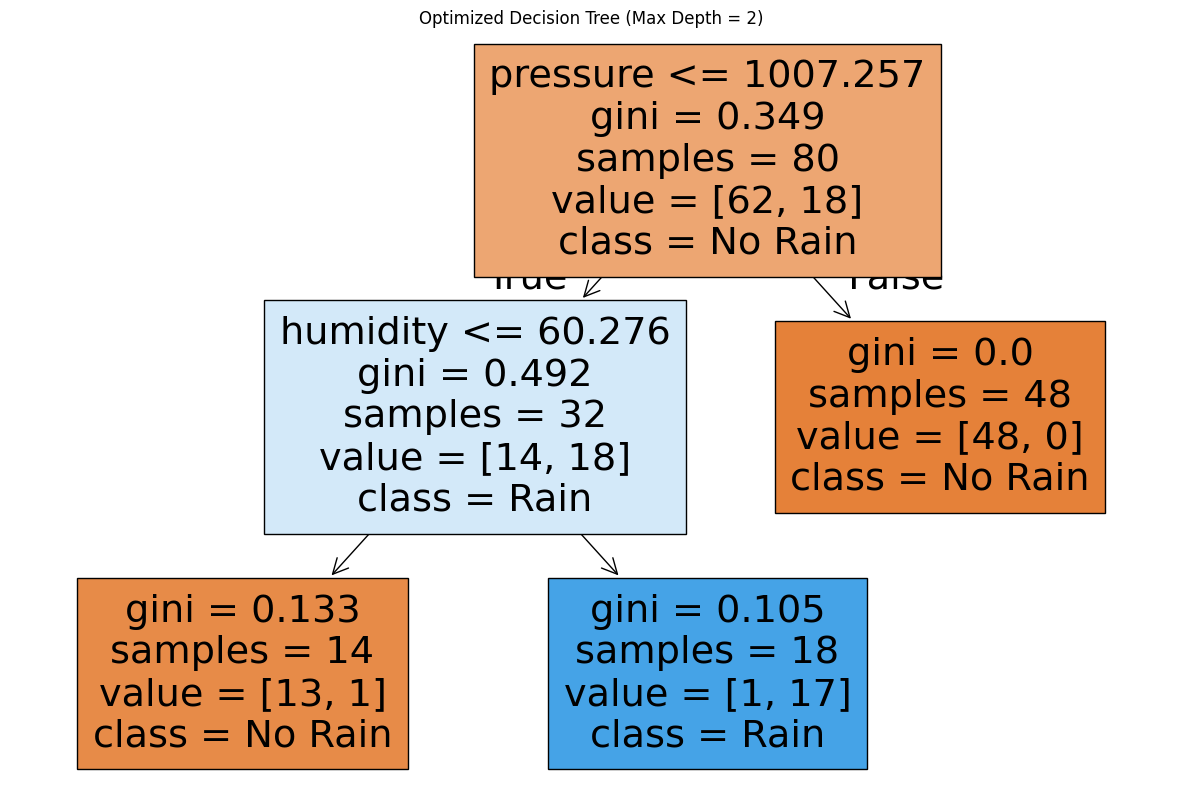

In [ ]:
# Part 2: Debugging Issues - Testing for overfitting
print("\n--- Part 2: Debugging Issues ---")

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

if train_accuracy - test_accuracy > 0.1:
    print("Possible overfitting detected")
    print("\nAdjusting tree depth to prevent overfitting...")

    depths = [2, 3, 4, 5]
    train_scores = []
    test_scores = []

    for depth in depths:
        model_pruned = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model_pruned.fit(X_train, y_train)

        train_pred = model_pruned.predict(X_train)
        test_pred = model_pruned.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)

        train_scores.append(train_acc)
        test_scores.append(test_acc)

        print(f"Max Depth = {depth}: Training Accuracy = {train_acc:.2f}, Testing Accuracy = {test_acc:.2f}")

    optimal_depth = depths[np.argmax(test_scores)]
    print(f"\nOptimal tree depth: {optimal_depth}")

    optimal_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
    optimal_model.fit(X_train, y_train)

    y_pred_optimal = optimal_model.predict(X_test)
    optimal_accuracy = accuracy_score(y_test, y_pred_optimal)

    print(f"Optimized Model Accuracy: {optimal_accuracy:.2f}")

    plt.figure(figsize=(15, 10))
    tree.plot_tree(optimal_model, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True)
    plt.title(f"Optimized Decision Tree (Max Depth = {optimal_depth})")
    plt.savefig('optimized_weather_decision_tree.png')
    print("Optimized decision tree visualization saved as 'optimized_weather_decision_tree.png'")

    model = optimal_model
else:
    print("No significant overfitting detected.")


--- Part 3: Evaluating the Model ---
Accuracy: 0.9500

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.83      0.91         6

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20


Confusion Matrix:
[[14  0]
 [ 1  5]]
Confusion matrix visualization saved as 'confusion_matrix.png'


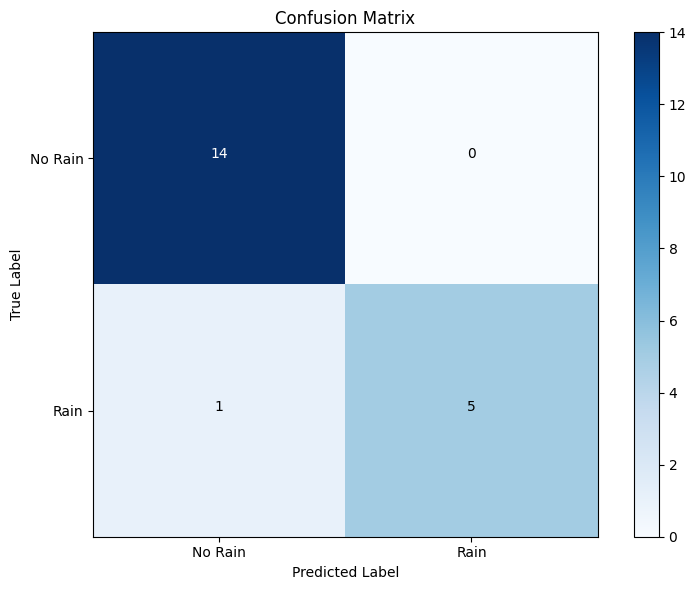

In [ ]:
# Part 3: Evaluating the Model
print("\n--- Part 3: Evaluating the Model ---")

y_pred_final = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_final)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_final)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Rain', 'Rain'])
plt.yticks(tick_marks, ['No Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Confusion matrix visualization saved as 'confusion_matrix.png'")


Feature Importance:
       Feature  Importance
3     pressure    0.503023
1     humidity    0.496977
0  temperature    0.000000
2   wind_speed    0.000000
Feature importance visualization saved as 'feature_importance.png'


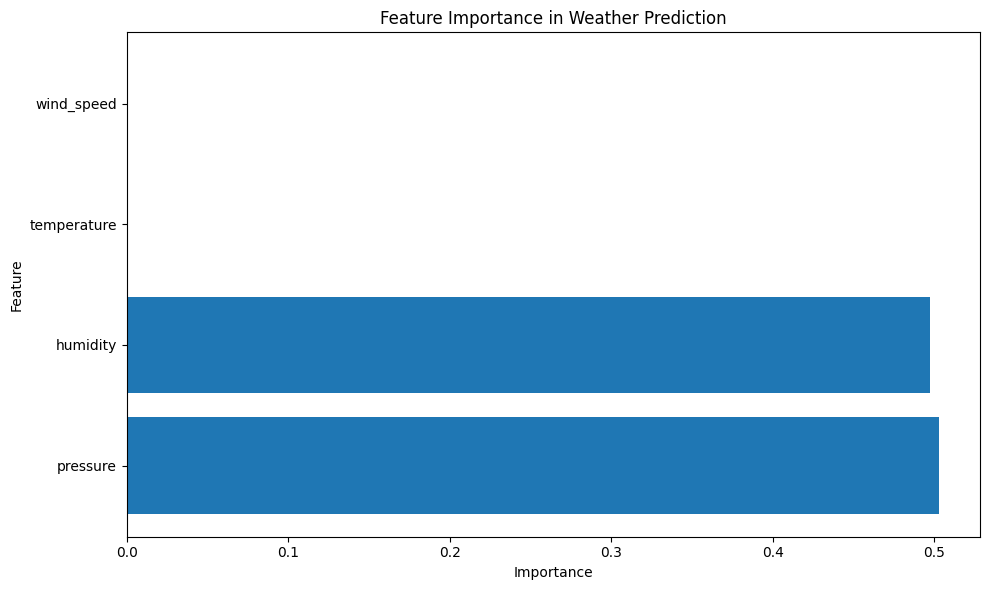

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Weather Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Feature importance visualization saved as 'feature_importance.png'")

In [ ]:
# Prediction function
print("\n--- Sample Weather Prediction Function ---")

def predict_weather(temperature, humidity, wind_speed, pressure):
    input_data = pd.DataFrame({
        'temperature': [temperature],
        'humidity': [humidity],
        'wind_speed': [wind_speed],
        'pressure': [pressure]
    })

    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0]

    if prediction == 1:
        return f"Rain is predicted with {probability[1]:.2f} confidence"
    else:
        return f"No rain is predicted with {probability[0]:.2f} confidence"

# Example predictions
print("Example prediction:")
print(predict_weather(temperature=20, humidity=85, wind_speed=5, pressure=1000))
print(predict_weather(temperature=30, humidity=40, wind_speed=15, pressure=1020))


--- Sample Weather Prediction Function ---
Example prediction:
Rain is predicted with 0.94 confidence
No rain is predicted with 1.00 confidence
